# Hypothesis to prove: Is there a correlation between the restaurant's Rating and its Price Range?

We know that Correlation does not imply Causation, lets try to check the same using Hypothesis testing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

#To Ignore Warnings in Output
import warnings
warnings.filterwarnings('ignore')

In [4]:
business = pd.read_csv("output files/business.csv")

In [5]:
business.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,categories,...,Seafood Markets,Wraps,Shaved Ice,Cupcakes,Greek,Flowers & Gifts,Home & Garden,French,Candy Stores,Chocolatiers & Shops
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,18054,40.338183,-75.471658,4.5,13,"Brewpubs, Breweries, Food",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,19106,39.953949,-75.143226,4.0,245,"Sushi Bars, Restaurants, Japanese",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,19147,39.943223,-75.162568,4.5,205,"Korean, Restaurants",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,19003,40.006707,-75.289671,3.5,109,"Pizza, Restaurants",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10163 entries, 0 to 10162
Columns: 147 entries, business_id to Chocolatiers & Shops
dtypes: float64(101), int64(35), object(11)
memory usage: 11.4+ MB


In [7]:
business.columns.tolist()

['business_id',
 'name',
 'address',
 'city',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'categories',
 'hours',
 'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThr',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi',
 'Pizza',
 'Sandwiches',
 'Nightlife',
 'Bars',
 'Coffee & Tea',
 'American (Traditional)',
 'Breakfast & Brunch',
 'Italian',
 'American (New)',
 'Specialty F

Text(0.5, 1.0, 'Number of Businesses for Each Rating')

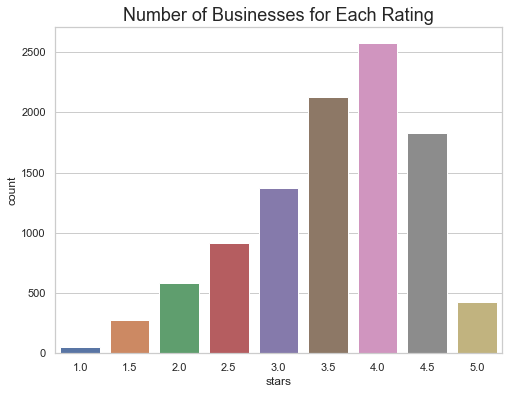

In [8]:
fig = plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.countplot(business['stars']).set_title('Number of Businesses for Each Rating',fontsize = 18)

Text(0.5, 1.0, 'Number of Businesses for Each Price Range')

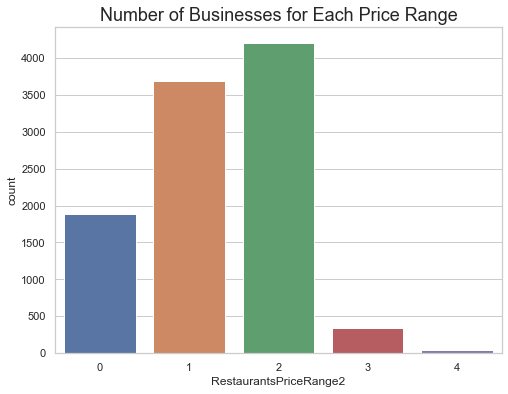

In [9]:
fig = plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.countplot(business['RestaurantsPriceRange2']).set_title('Number of Businesses for Each Price Range',fontsize = 18)

Text(0.5, 1.0, 'Boxplot showing comparision between RestaurantsPriceRange2 and  stars')

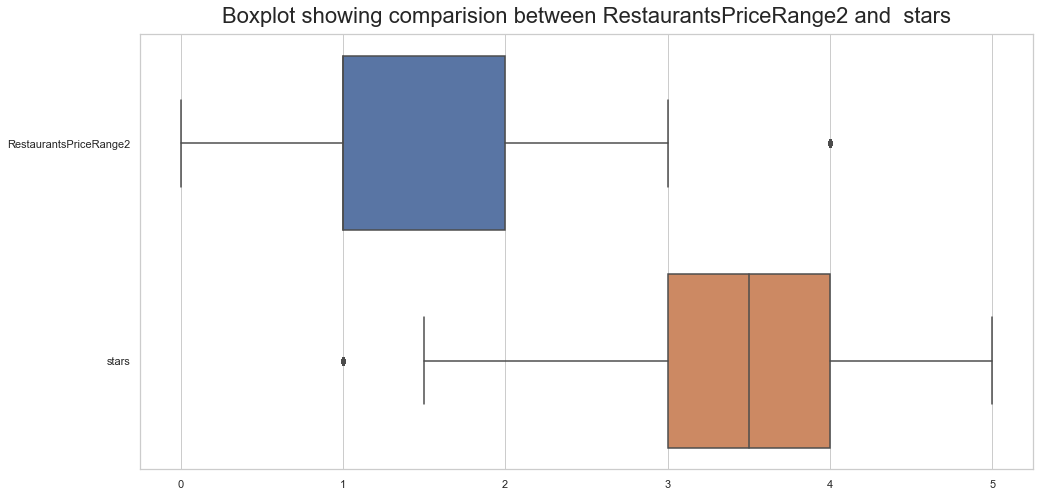

In [10]:
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(data=business[["RestaurantsPriceRange2", "stars"]], orient="h")
boxplot.set_title('Boxplot showing comparision between RestaurantsPriceRange2 and  stars', fontdict={'fontsize':22}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap')

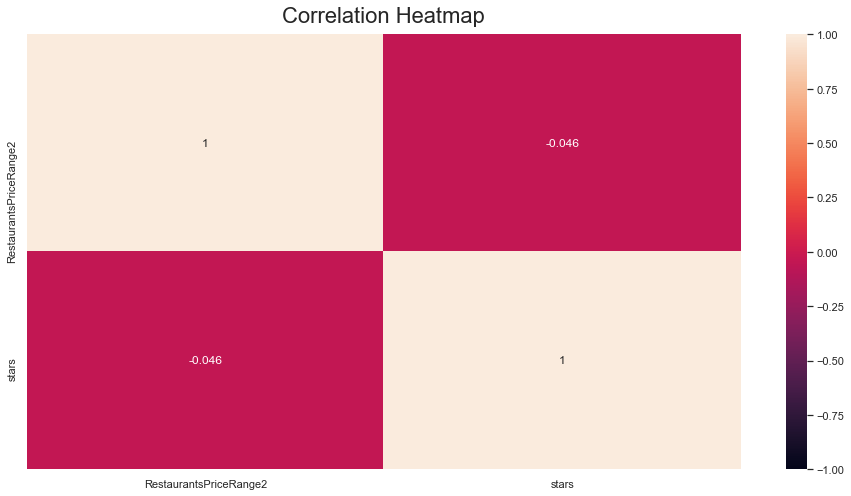

In [11]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(business[["RestaurantsPriceRange2", "stars"]].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':22}, pad=12)

## Pearson’s correlation coefficient
Pearson correlation (r) is used to measure strength and direction of a linear relationship between two variables. Mathematically this can be done by dividing the covariance of the two variables by the product of their standard deviations.


Pearson’s correlation : The value of r ranges between -1 and 1. A correlation of -1 shows a perfect negative correlation, while a correlation of 1 shows a perfect positive correlation. A correlation of 0 shows no relationship between the movement of the two variables.

###### The table below demonstrates how to interpret the size (strength) of a correlation coefficient.
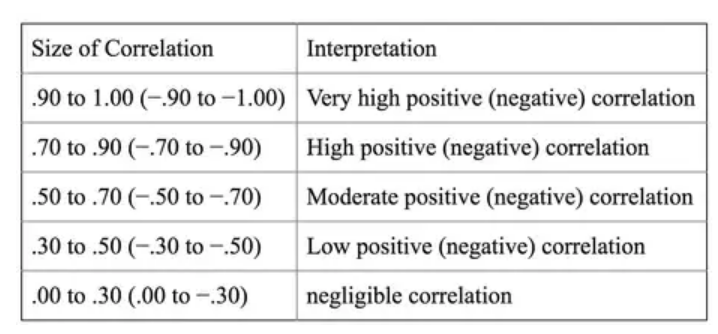

###### In our case we see that we have negligible correaltion 

## But, Lets try to run a Hypothesis Test to prove the correlation

##### The hypothesis test will let us infer whether the value of the population correlation coefficient ρ is close to 0 or significantly different from 0. 

#### State the hypothesis

H0: There is no relationship between Star Rating and RestaurantsPriceRange. (ρ = 0)


H1: There is a relationship between Star Rating  and RestaurantsPriceRange. (ρ != 0)

###### significance level = 0.05

#### Calculate the p-Value using Scipy library

In [12]:
# Conducting Hypothesis Testing using Pearson’s correlation coefficient function from Scipy

cor,P_val = scipy.stats.pearsonr(business['stars'], business['RestaurantsPriceRange2'])

print("Correlation between variables:", round(cor,4))
print("P-value obtained on runing the test:", P_val)

Correlation between variables: -0.0458
P-value obtained on runing the test: 3.946714017698629e-06


In [13]:
#Calculating slope, Intercept , r_value and , P_value and Std_err using Linregress fuction

slope, intercept, r_value, p_value, std_err = stats.linregress(business.RestaurantsPriceRange2,business.stars)

print("slope between variables:", round(slope,4))
print("intercept between variables:", round(intercept,4))
print("Correlation obtained on runing the test:", round(r_value,4))
print("P-value obtained on runing the test:", p_value)

slope between variables: -0.0474
intercept between variables: 3.6199
Correlation obtained on runing the test: -0.0458
P-value obtained on runing the test: 3.946714017733994e-06


In [14]:
# Conducting Hypothesis testing using statsmodels.api

import statsmodels.api as sm

## X is the input variables (or independent variables) Y is target/dependent variable
X = business[['stars']]
y = business['RestaurantsPriceRange2']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     RestaurantsPriceRange2   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                  0.002
Method:                     Least Squares   F-statistic:                     21.31
Date:                    Wed, 14 Dec 2022   Prob (F-statistic):           3.95e-06
Time:                            11:28:40   Log-Likelihood:                -12441.
No. Observations:                   10163   AIC:                         2.489e+04
Df Residuals:                       10161   BIC:                         2.490e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4665      0.035     41.926      0.000       1.398       1.535
stars         -0.0441      0.010     -4.617      0.000      -0.063      -0.025
==============================================================================
Omnibus:                      210.602   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.089
Skew:                          -0.051   Prob(JB):                     1.02e-25
Kurtosis:                       2.489   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CONCLUSION: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Star Rating  and RestaurantsPriceRange.

#### The slope is negative -0.0474 which also signifies that the stars decreases by 0.0474 when the price range increases.

### Second Hypothesis:

Null Hypothesis:(H0) Businesses in Philadelphia have higher ratings compared to average rating of PA state.


Alternative Hypothesis:(H1) Businesses in Philadelphia have same ratings as that of PA state.

In [15]:
phil = business[business['city'].str.contains('Philadelphia')]
phil

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,categories,...,Seafood Markets,Wraps,Shaved Ice,Cupcakes,Greek,Flowers & Gifts,Home & Garden,French,Candy Stores,Chocolatiers & Shops
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,19106,39.953949,-75.143226,4.0,245,"Sushi Bars, Restaurants, Japanese",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,19147,39.943223,-75.162568,4.5,205,"Korean, Restaurants",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,19123,39.962582,-75.135657,3.5,65,"Eatertainment, Arts & Entertainment, Brewpubs,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,"Restaurants, Automotive, Delis, Gas Stations, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,K1SsvIPfFcHniNSPc3IG7g,Flip-N-Pizza,1308 W Girard Ave,Philadelphia,19123,39.970720,-75.157752,4.0,16,"Restaurants, American (Traditional), Chicken W...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10154,mzTTdvQGkUHZ8ii7OnZC5w,Trader Joe's,2121 Market St,Philadelphia,19103,39.954178,-75.175980,4.0,494,"Beer, Wine & Spirits, Shopping, Grocery, Flori...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10155,OfRbGvHn-nAnQMqNxiIpcA,Grilly Cheese,3306 Arch St,Philadelphia,19104,39.957447,-75.189916,3.0,5,"Specialty Food, Event Planning & Services, Res...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10160,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,19128,40.032483,-75.214430,3.0,55,"Restaurants, Specialty Food, Food, Sandwiches,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print('Average rating in Philadelphia :\t%.2f\nAverage rating for in PA:\t%.2f' % (phil['stars'].mean(), business['stars'].mean()))

Average rating in Philadelphia :	3.59
Average rating for in PA:	3.56


In [17]:
stats.ttest_ind(phil['stars'], business['stars'] , equal_var=False)

Ttest_indResult(statistic=1.9507755947558074, pvalue=0.051117852913665725)

### significance level = 0.05
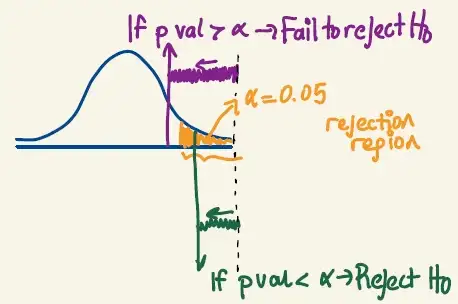

##### We reject Null hypothesis because p-value is greater than 0.05

### CONCLUSION: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis.